# British Airway Lounge Eligibility

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exploratory data analysis
- `FLIGHT_NO` can be used as a unique identifier for the provided flights.
- `TIME_OF_DAY`, `ARRIVAL_STATION_CD`, `ARRIVAL_COUNTRY`, `ARRIVAL_REGION`, `HAUL`, `AIRCRAFT_TYPE` are non-numeric variables that can provide distinct groupings.
    - Usage of exact flight or aircraft details is discouraged, so `FLIGHT_DATE`, `FLIGHT_TIME`, `ARRIVAL_STATION_CD`, `ARRIVAL_COUNTRY`, `ARRIVAL_REGION` are discouraged from being used.
- Will need to create variables to calculate the proportion of customers eligible for each tier within each flight.

In [2]:
df = pd.read_excel("British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx")

# Define the custom order for TIME_OF_DAY
time_order = ['Morning', 'Lunchtime', 'Afternoon', 'Evening']  # Adjust as needed

# Convert TIME_OF_DAY to a categorical variable with custom order
df['TIME_OF_DAY'] = pd.Categorical(
    df['TIME_OF_DAY'], 
    categories=time_order, 
    ordered=True
)

df.head()

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FLIGHT_DATE           10000 non-null  datetime64[ns]
 1   FLIGHT_TIME           10000 non-null  object        
 2   TIME_OF_DAY           10000 non-null  category      
 3   AIRLINE_CD            10000 non-null  object        
 4   FLIGHT_NO             10000 non-null  object        
 5   DEPARTURE_STATION_CD  10000 non-null  object        
 6   ARRIVAL_STATION_CD    10000 non-null  object        
 7   ARRIVAL_COUNTRY       10000 non-null  object        
 8   ARRIVAL_REGION        10000 non-null  object        
 9   HAUL                  10000 non-null  object        
 10  AIRCRAFT_TYPE         10000 non-null  object        
 11  FIRST_CLASS_SEATS     10000 non-null  int64         
 12  BUSINESS_CLASS_SEATS  10000 non-null  int64         
 13  ECONOMY_SEATS    

,FLIGHT_DATE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2025-07-14 07:04:04.800000,1.547200,25.073800,198.385900,0.607700,7.951900,30.421400
min,2025-04-01 00:00:00,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000
25%,2025-05-22 00:00:00,0.000000,8.000000,167.000000,0.000000,4.000000,20.000000
50%,2025-07-13 00:00:00,0.000000,17.000000,175.000000,0.000000,8.000000,30.000000
75%,2025-09-06 00:00:00,0.000000,35.000000,180.000000,1.000000,11.000000,41.000000
max,2025-10-30 00:00:00,14.000000,97.000000,358.000000,20.000000,29.000000,92.000000
std,NaN,3.625395,22.142348,53.653478,1.006232,5.130752,15.284233


In [4]:
for column in df.columns:
    print(column)
    print(df[column].unique())

FLIGHT_DATE
<DatetimeArray>
['2025-09-02 00:00:00', '2025-06-10 00:00:00', '2025-10-27 00:00:00',
 '2025-06-15 00:00:00', '2025-08-25 00:00:00', '2025-07-12 00:00:00',
 '2025-09-16 00:00:00', '2025-04-24 00:00:00', '2025-05-17 00:00:00',
 '2025-05-01 00:00:00',
 ...
 '2025-07-10 00:00:00', '2025-07-23 00:00:00', '2025-04-19 00:00:00',
 '2025-08-26 00:00:00', '2025-10-07 00:00:00', '2025-09-18 00:00:00',
 '2025-09-24 00:00:00', '2025-06-09 00:00:00', '2025-08-07 00:00:00',
 '2025-10-23 00:00:00']
Length: 210, dtype: datetime64[ns]
FLIGHT_TIME
[datetime.time(14, 19) datetime.time(6, 42) datetime.time(15, 33) ...
 datetime.time(17, 38) datetime.time(11, 52) datetime.time(11, 24)]
TIME_OF_DAY
['Afternoon', 'Morning', 'Evening', 'Lunchtime']
Categories (4, object): ['Morning' < 'Lunchtime' < 'Afternoon' < 'Evening']
AIRLINE_CD
['BA']
FLIGHT_NO
['BA5211' 'BA7282' 'BA1896' ... 'BA1631' 'BA9712' 'BA8374']
DEPARTURE_STATION_CD
['LHR']
ARRIVAL_STATION_CD
['LAX' 'FRA' 'IST' 'VIE' 'AMS' 'ORD' 'MUC

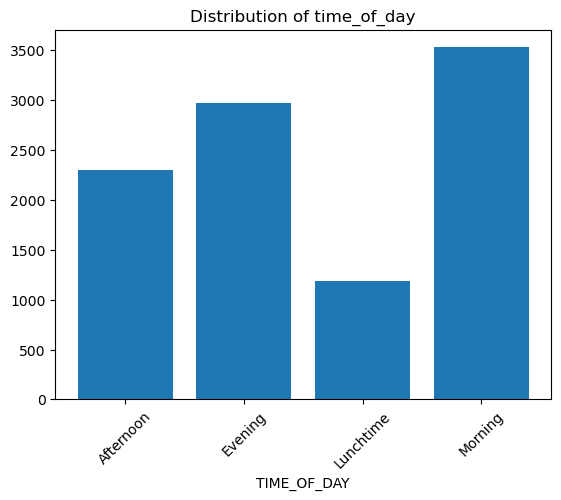

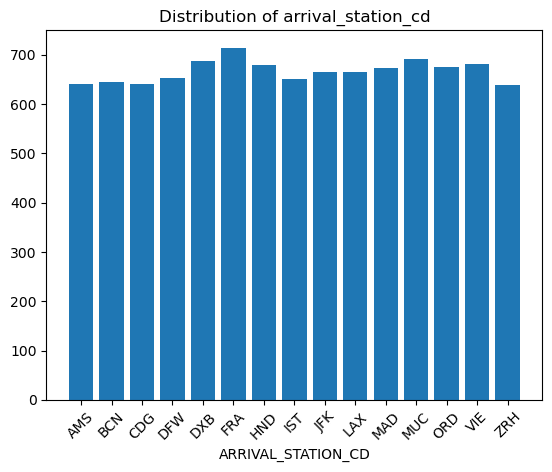

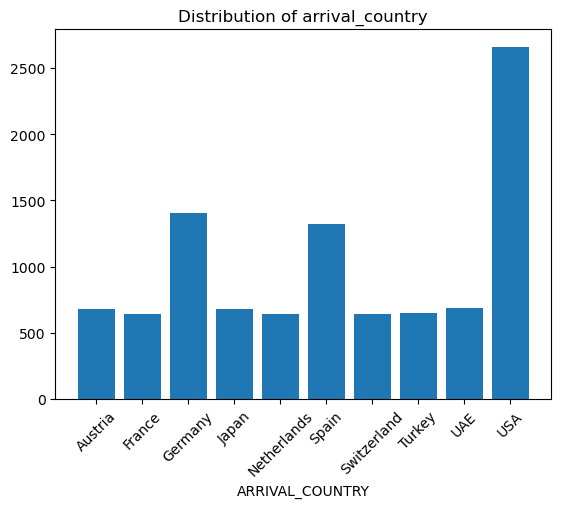

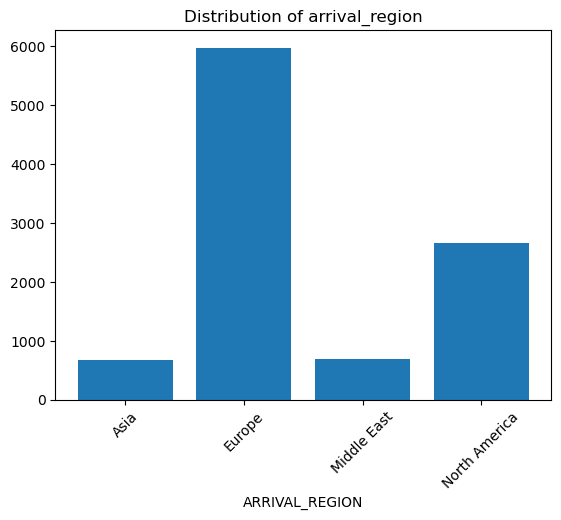

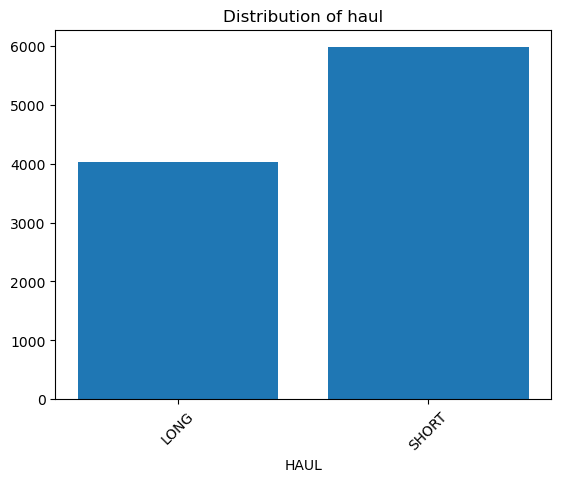

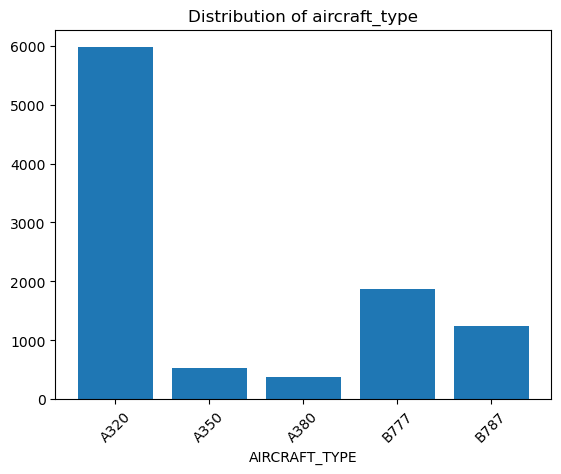

In [5]:
# Bar plots for categorical columns 
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://stackoverflow.com/questions/39135472/setting-order-of-columns-with-matplotlib-bar-chart
for i in range(0,6):
    f = ["TIME_OF_DAY", "ARRIVAL_STATION_CD", "ARRIVAL_COUNTRY", "ARRIVAL_REGION", "HAUL", "AIRCRAFT_TYPE"][i]
    frame = df[f].astype("string")
    f_cats = frame.value_counts().sort_index()
    plt.bar(f_cats.index, f_cats)
    plt.xlabel(f)
    plt.xticks(rotation=45)
    plt.title("Distribution of " + f.lower()) 
    plt.show() 

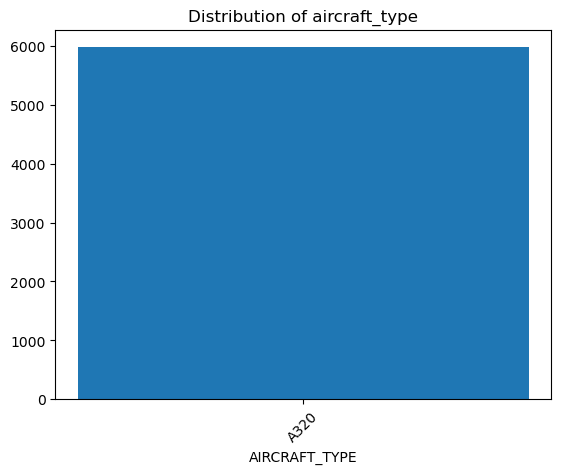

In [6]:
frame = df[df["HAUL"] == "SHORT"]["AIRCRAFT_TYPE"].astype("string")
f_cats = frame.value_counts().sort_index()
plt.bar(f_cats.index, f_cats)
plt.xlabel(f)
plt.xticks(rotation=45)
plt.title("Distribution of " + f.lower()) 
plt.show() 

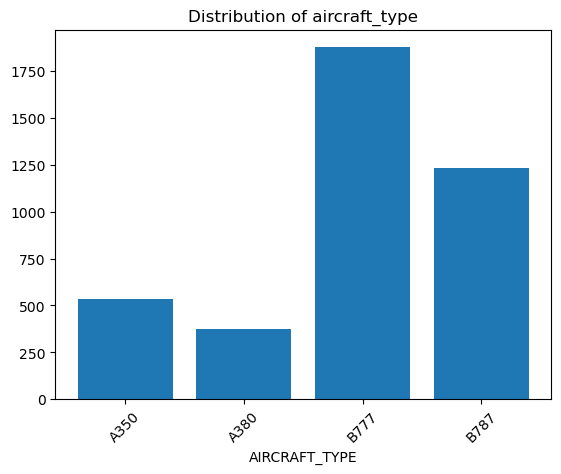

In [7]:
frame = df[df["HAUL"] == "LONG"]["AIRCRAFT_TYPE"].astype("string")
f_cats = frame.value_counts().sort_index()
plt.bar(f_cats.index, f_cats)
plt.xlabel(f)
plt.xticks(rotation=45)
plt.title("Distribution of " + f.lower()) 
plt.show() 

## Feature engineering

In [8]:
df["TIER1_ELIGIBLE_PROP"] = df["TIER1_ELIGIBLE_PAX"]/(df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"] + df["ECONOMY_SEATS"]) * 100
df["TIER2_ELIGIBLE_PROP"] = df["TIER2_ELIGIBLE_PAX"]/(df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"] + df["ECONOMY_SEATS"]) * 100
df["TIER3_ELIGIBLE_PROP"] = df["TIER3_ELIGIBLE_PAX"]/(df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"] + df["ECONOMY_SEATS"]) * 100
df.head()

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX,TIER1_ELIGIBLE_PROP,TIER2_ELIGIBLE_PROP,TIER3_ELIGIBLE_PROP
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38,0.0,4.255319,16.170213
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28,0.0,2.978723,11.914894
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40,0.0,6.111111,22.222222
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54,0.0,8.888889,30.000000
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27,0.0,3.333333,15.000000


In [9]:
result = (
    df.groupby(['AIRCRAFT_TYPE', 'TIME_OF_DAY'])
    [['TIER1_ELIGIBLE_PROP', 'TIER2_ELIGIBLE_PROP', 'TIER3_ELIGIBLE_PROP']]
    .mean().reset_index().sort_values(['AIRCRAFT_TYPE', 'TIME_OF_DAY'])
)
result.to_csv('longe_eligibility.csv', index=False)
result

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_90836/2514370175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AIRCRAFT_TYPE', 'TIME_OF_DAY'])


,AIRCRAFT_TYPE,TIME_OF_DAY,TIER1_ELIGIBLE_PROP,TIER2_ELIGIBLE_PROP,TIER3_ELIGIBLE_PROP
0,A320,Morning,0.339939,4.357983,16.742925
1,A320,Lunchtime,0.394100,4.548657,17.275062
2,A320,Afternoon,0.341630,4.313486,16.587360
3,A320,Evening,0.328410,4.451611,16.995700
4,A350,Morning,0.166571,2.456112,9.408018
5,A350,Lunchtime,0.109860,2.327657,9.001648
6,A350,Afternoon,0.213906,2.513948,9.491256
7,A350,Evening,0.160890,2.248878,8.729151
8,A380,Morning,0.116876,1.827371,6.900419
9,A380,Lunchtime,0.063390,1.475249,5.889472


## Lounge Eligibility Lookup Table

| Grouping | Tier 1 % | Tier 2 % | Tier 3 % | Notes |
|:--------|:--------|:--------|:--------|:--------|
|  A320_Morning   |  0.339939  | 4.357983 |  16.742925   |     |
|  A320_Lunchtime   |  0.394100   |  4.548657   |  17.275062   |     |
|  A320_Afternoon   |  0.341630  | 4.313486 |  16.587360   |     |
|  A320_Evening   |  0.328410   | 4.451611 | 16.995700 |     |
|  A350_Morning   | 0.166571   |  2.456112   |  9.408018   |     |
|  A350_Lunchtime   |  0.109860   |  2.327657   |  9.001648   |     |
|  A350_Afternoon   |  0.213906 |  2.513948  |  9.491256  |     |
|  A350_Evening   |  0.160890  |  2.248878  |  8.729151   |     |
|  A380_Morning   |  0.116876   |  1.827371  |  6.900419   |     |
|  A380_Lunchtime   |  0.063390   |  1.475249  |  5.889472  |     |
|  A380_Afternoon   |  0.125877  |  1.620983  |  6.270712  |     |
|  A380_Evening   |  0.123350 |  1.596504  |  6.193942  |     |
|  B777_Morning   |  0.217105  |  2.862016  |  10.913431  |     |
|  B777_Lunchtime   |  0.210078   |  2.758080 |  10.522348  |     |
|  B777_Afternoon   |  0.188983 |  2.872681 |  10.914933  |     |
|  B777_Evening   |  0.228226  |  2.747416  |  10.571893  |     |
|  B787_Morning   |  0.283405  |  3.644479  |  13.896755  |     |
|  B787_Lunchtime   |  0.224085  |  3.707149  |  14.140801  |     |
|  B787_Afternoon   |  0.251063  |  3.646399  |  13.896275  |     |
|  B787_Evening   |  0.289045  |  3.683866  |  13.974737  |     |

## Justification
| Prompt | Response |
|:--------|:--------|
| How did you group the flights in your table? | Flights were grouped by `TIME_OF_DAY`, `HAUL`, and `AIRCRAFT_TYPE`. |
| Why did you choose that grouping method? | Flight types and departure times often influence customer profiles and lounge usage behaviours. Different types of aircrafts have different proportions of each type of seating, and thus may impact the accessibility for lounge usages, such as Tier 1 permitting all First Class customers. `AIRCRAFT_TYPE == 'A320'` is the only aircraft used for `HAUL == 'SHORT'`. |
| What assumptions did you make about passenger eligibility? | We assumed that shorter-haul flights would have less premium passengers, and conversely, more premium and business-class passengers would be in longer-haul flights. Additionally, it is assumed that aircrafts with a greater proportion of first-class and business class seating would have higher-ranked passengers. |
| How can your model apply to future or changing flight schedules? | Due to the model focusing on attributes that are relatively more generalised rather than specific destinations or times, the conditions for future flight schedules can be applied or updated based on these generalisations. |